# Capstone Project: Consumer Insights Data Analytics Externship of Beats by Dre

## 1. Title Page
**Project Title:** Consumer Insights Data Analytics Externship of Beats by Dre  
**Student Name:** San Davran
**Date:** 09/01/2024

## 2. Table of Contents
1. Title Page
2. Table of Contents
3. Introduction
4. Data Description
5. Exploratory Data Analysis (EDA)
6. Sentiment Analysis
7. AI-Generated Insights
8. Comparative Analysis
9. Strategic Recommendations
10. Conclusion

## 3. Introduction

### 3.1 Project Overview

- The purpose of this project is to leverage extensive data from E-commerce platforms to provide data-driven recommendations to Beats by Dre. By analyzing customer feedback and purchasing patterns, the project aims to identify product improvements and optimize marketing strategies to better meet consumer needs and enhance the brand’s market presence.

### 3.2 Background

- Beats by Dre, a subsidiary of Apple Inc., is a leading brand in the audio technology industry, known for its premium headphones, earbuds, and speakers. Since its founding in 2006 by Dr. Dre and Jimmy Iovine, the brand has positioned itself at the intersection of high-quality sound engineering and cultural relevance, particularly in music and sports. Beats products are often associated with stylish design and powerful bass, making them popular among a broad range of consumers.

- In the tech industry, consumer sentiment analysis is crucial for brands like Beats by Dre. It involves examining customer feedback, reviews, and social media discussions to gauge public perception of products and services. This analysis provides valuable insights into consumer preferences, pain points, and emerging trends. For a brand that competes in a rapidly evolving market, understanding consumer sentiment is vital for staying ahead of competitors, refining product offerings, and crafting effective marketing strategies. By responding to consumer feedback, companies like Beats by Dre can enhance user experience, build brand loyalty, and drive sales growth in a competitive landscape.

## 4. Data Description

### 4.1 Data Sources

**Data Source.**

- Amazon reviews.

### 4.2 Data Collection

- To gather the data needed for analysis, I wrote a script utilizing the OxyLabs API to extract reviews from Amazon. E-commerce platforms like Amazon have robust systems in place to prevent data mining, making it challenging to obtain this information. However, by carefully varying certain characteristics of the queries, I was able to successfully retrieve 1,000 rows of data, with 100 reviews for each product. This dataset is crucial for performing a comprehensive sentiment analysis, which will inform our recommendations to Beats by Dre.

### 4.3 Data Cleaning

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/merge_df.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   review_id           1000 non-null   object
 1   product_id          1000 non-null   object
 2   title               1000 non-null   object
 3   author              1000 non-null   object
 4   rating              1000 non-null   int64 
 5   content             1000 non-null   object
 6   timestamp           1000 non-null   object
 7   profile_id          1000 non-null   object
 8   is_verified         1000 non-null   bool  
 9   helpful_count       1000 non-null   int64 
 10  product_attributes  967 non-null    object
dtypes: bool(1), int64(2), object(8)
memory usage: 79.2+ KB


In [ ]:
df.head()

,review_id,product_id,title,author,rating,content,timestamp,profile_id,is_verified,helpful_count,product_attributes
0,R1F236Q566CSRQ,B07PXGQC1Q,5.0 out of 5 stars **⭐️⭐️⭐️⭐️⭐️ Best Wireless ...,Christopher Domenici,5,I recently purchased the Apple AirPods (2nd Ge...,"Reviewed in the United States July 24, 2024",AGRIDBGN53EGTU3SUFCAVHTUS2XA,True,21,Set: Without AppleCare+
1,R2QGEC3WRQRMLX,B07PXGQC1Q,5.0 out of 5 stars Very practical,renee,5,"Taking the Apple AirPods at face value, they'r...","Reviewed in the United States October 19, 2023",AEYO6M357PGA7I2MHHB2FQ5FSDEA,True,224,Set: Without AppleCare+
2,R1L7RJCQRMP8HZ,B07PXGQC1Q,5.0 out of 5 stars Perfect balance of convenie...,Vinay Medishetty,5,The media could not be loaded. I recently purc...,"Reviewed in the United States July 9, 2024",AGJEEE2NO5K4FZZH3ANG2YCS3Y6Q,True,25,Set: Without AppleCare+
3,R2J13VIR7YF41K,B07PXGQC1Q,5.0 out of 5 stars Excellent buy,Macu DS,5,"I recently purchased these headphones, and I c...","Reviewed in the United States July 31, 2024",AGNOQXDLLSQUEC2SHCGLECIMILIQ,True,2,Set: Without AppleCare+
4,R2HFARWKGGKX25,B07PXGQC1Q,5.0 out of 5 stars Great quality and price,Ruby,5,Most “official” websites and stores have these...,"Reviewed in the United States July 29, 2024",AEDFNJY4VWMPWWFQ4DNMTS2OJDPA,True,3,Set: Without AppleCare+


In [ ]:
df.describe()

,rating,helpful_count
count,1000.000000,1000.000000
mean,4.370000,10.184000
std,0.804828,56.550439
min,1.000000,0.000000
25%,4.000000,0.000000
50%,5.000000,0.000000
75%,5.000000,2.000000
max,5.000000,1128.000000


- **Is there any missing values?**

In [ ]:
df.isna().sum()

,0
review_id,0
product_id,0
title,0
author,0
rating,0
content,0
timestamp,0
profile_id,0
is_verified,0
helpful_count,0


1. There are 33 missing values, all of them are in the column "product_attributes".
2. **Is this distributed evenly, or is the problem with a specific product?**

In [ ]:
nan_attributes_df = df[df['product_attributes'].isna()]
product_id_counts = nan_attributes_df['product_id'].value_counts()
total_nan_count = nan_attributes_df.shape[0]
percentage_distribution = (product_id_counts / total_nan_count) * 100

In [ ]:
percentage_distribution

,count
product_id,
B09CGM1BWH,100.0


- All of the Null values are coming from the same product. Deleting all of the rows with Null values can create an unbalanced dataset in terms of products. **Is this just a technical issue?**

- The name of the product with id "B09CGM1BWH" is Soundcore Liberty 3 Pro.

In [ ]:
unique_values = df['product_attributes'].unique()
unique_values

array(['Set: Without AppleCare+', 'Configuration: Without AppleCare+',
       'Style: Without AppleCare+',
       'Color: IvoryStyle: Studio Buds +Set: Without AppleCare+',
       'Color: Black/GoldStyle: Studio Buds +Set: Without AppleCare+',
       'Color: TransparentStyle: Studio Buds +Set: Without AppleCare+',
       'Color: Cosmic SilverStyle: Studio Buds +Set: Without AppleCare+',
       'Color: Cosmic SilverStyle: Studio Buds +Set: With AppleCare+ (2 Years)',
       'Color: Triple Black', 'Color: Soapstone', 'Color: Eclipse Grey',
       'Color: Charcoal', 'Color: Fog', 'Color: Porcelain',
       'Color: Lemongrass', 'Color: Coral', 'Color: Bay', 'Color: Black',
       'Color: Blue', 'Color: Silver', 'Color: Midnight Black', nan,
       'Color: WhiteSize: SmallPattern: Earbuds',
       'Color: BlackSize: SmallPattern: Earbuds',
       'Color: BlueSize: SmallPattern: Earbuds'], dtype=object)

- Most of the "product_attributes" column specifies the color of the product.

- For Apple products, the column specifies with or without AppleCare+.

- **Are there products in the dataset with different color but with the same product id?**

In [ ]:
# hash_map -> product_id : set().
hash_map = {}
# Create a key for each value of the "product_id" column.
for product_id in df['product_id']:
  hash_map[product_id] = set()
# For each row in the dataframe, add the value associated with the column called "product_attributes" to the set hash_map[product_id].
for index, row in df.iterrows():
  hash_map[row['product_id']].add(row['product_attributes'])
hash_map

{'B07PXGQC1Q': {'Set: Without AppleCare+'},
 'B0D1WXVQTN': {'Configuration: Without AppleCare+'},
 'B0D1XD1ZV3': {'Style: Without AppleCare+'},
 'B0C2WD567R': {'Color: Black/GoldStyle: Studio Buds +Set: Without AppleCare+',
  'Color: Cosmic SilverStyle: Studio Buds +Set: With AppleCare+ (2 Years)',
  'Color: Cosmic SilverStyle: Studio Buds +Set: Without AppleCare+',
  'Color: IvoryStyle: Studio Buds +Set: Without AppleCare+',
  'Color: TransparentStyle: Studio Buds +Set: Without AppleCare+'},
 'B0B4PSQHD5': {'Color: Eclipse Grey',
  'Color: Soapstone',
  'Color: Triple Black'},
 'B0B1N7RT74': {'Color: Bay',
  'Color: Charcoal',
  'Color: Coral',
  'Color: Fog',
  'Color: Lemongrass',
  'Color: Porcelain'},
 'B09V9X91ZP': {'Color: Black', 'Color: Blue', 'Color: Silver'},
 'B09V9P5Q6W': {'Color: Black', 'Color: Blue', 'Color: Silver'},
 'B09CGM1BWH': {'Color: Midnight Black', nan},
 'B0C1QNRGHC': {'Color: BlackSize: SmallPattern: Earbuds',
  'Color: BlueSize: SmallPattern: Earbuds',
  'C

- There can be products that have the same product id but have different colors. For the product we are interested in 77 of the reviews have the value "Color: Midnight Black" in the "product_attributes" column, while 33 of the reviews have a Null value.
- Here, we have 2 options, we can either delete all of the reviews with a Null value, leading to an unbalanced dataset, or we can set the value associated with the "product_attributes" column for the reviews with a Null value associated with the "product_attributes" column to "Not Known" indicating that we are not sure about it.
- I have decided to set the value associated with the "product_attributes" column for the reviews with a Null value associated with the "product_attributes" column to "Not Known'.

In [ ]:
df['product_attributes'].fillna('Not Known', inplace=True)

In [ ]:
df.isna().sum()

,0
review_id,0
product_id,0
title,0
author,0
rating,0
content,0
timestamp,0
profile_id,0
is_verified,0
helpful_count,0


In [ ]:
df.drop(columns=['author', 'profile_id'], inplace=True)

In [ ]:
df['is_verified'] = df['is_verified'].apply(lambda x: 1 if x == True else 0)

In [ ]:
df.drop(columns=['is_verified'], inplace=True)

In [ ]:
def get_the_year(string):
  year = int(string[-4:])
  return year

In [ ]:
df['timestamp'] = df['timestamp'].apply(get_the_year)
df.set_index('review_id', inplace=True)
df.rename(columns={'timestamp': 'year'}, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, R1F236Q566CSRQ to R3Q6EZYWSQCBU8
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   product_id          1000 non-null   object
 1   title               1000 non-null   object
 2   rating              1000 non-null   int64 
 3   content             1000 non-null   object
 4   year                1000 non-null   int64 
 5   helpful_count       1000 non-null   int64 
 6   product_attributes  1000 non-null   object
dtypes: int64(3), object(4)
memory usage: 62.5+ KB


## 5. Exploratory Data Analysis (EDA)

### 5.1 Data Overview

In [ ]:
df.describe()

,rating,year,helpful_count
count,1000.000000,1000.00000,1000.000000
mean,4.370000,2023.71400,10.184000
std,0.804828,0.60047,56.550439
min,1.000000,2020.00000,0.000000
25%,4.000000,2024.00000,0.000000
50%,5.000000,2024.00000,0.000000
75%,5.000000,2024.00000,2.000000
max,5.000000,2024.00000,1128.000000


### 5.2 Visualizations

**Chart 1.**

- This chart illustrates the rating distribution for each product, allowing us to compare their performance against one another. By analyzing this data, we gain valuable insights into customer sentiment toward the products under review, helping us identify strengths and areas for improvement.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

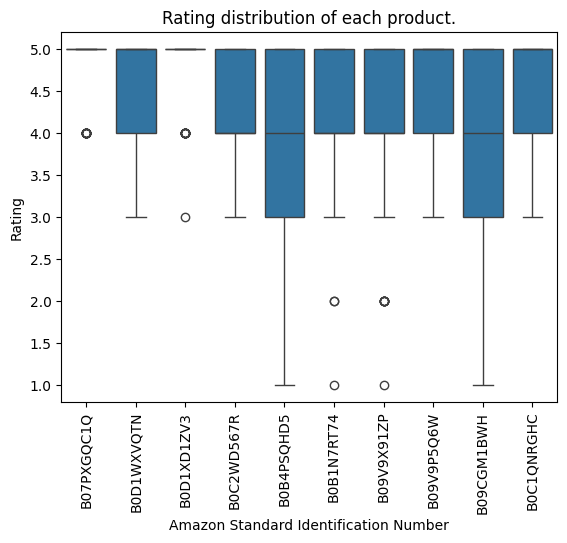

In [ ]:
sns.boxplot(x='product_id', y='rating', data=df)
plt.title('Rating distribution of each product.')
plt.xlabel('Amazon Standard Identification Number')
plt.ylabel('Rating')
plt.xticks(rotation=90)
plt.show()

**Chart 2.**

- This chart displays the distribution of upvotes across the reviews. While most products have evenly distributed upvotes, the Google Pixel Buds Pro stands out with 10 times more upvotes for reviews with a 1-star rating. This suggests a strong negative sentiment toward the product, as users are amplifying the negative feedback.

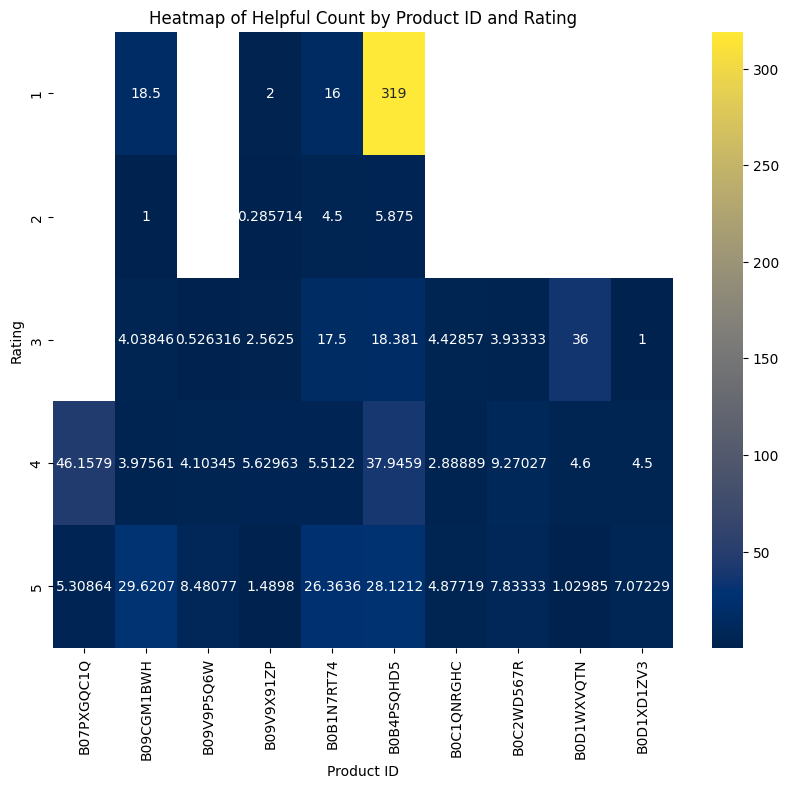

In [ ]:
# Pivot the DataFrame to get the structure needed for the heatmap
heatmap_data = df.pivot_table(index='rating', columns='product_id', values='helpful_count')

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, cmap='cividis', annot=True, fmt="g")  # 'annot=True' will display the values in the heatmap cells
plt.title('Heatmap of Helpful Count by Product ID and Rating')
plt.xlabel('Product ID')
plt.ylabel('Rating')
plt.show()

**Chart 3.**

- This chart illustrates the correlation between the variables Year, Rating, and Helpful Count. The analysis reveals that there is little to no correlation between these factors, indicating that these variables do not significantly influence each other in the context of the data analyzed.








In [ ]:
import numpy as np

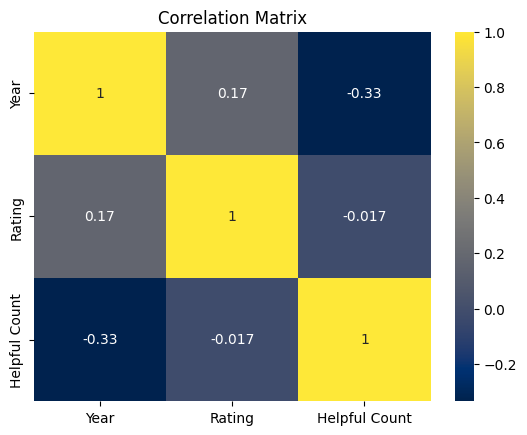

In [ ]:
data = df[["year", "rating", "helpful_count"]].values
corr_matrix = np.corrcoef(data, rowvar=False)
sns.heatmap(corr_matrix, cmap='cividis', annot=True, xticklabels=["Year", "Rating", "Helpful Count"], yticklabels=["Year", "Rating", "Helpful Count"])
plt.title("Correlation Matrix")
plt.show()

### 5.3 Descriptive Statistics

- The analysis shows that the data is of high quality, with minimal anomalies detected. The consistency across the dataset suggests reliable and accurate information, providing a solid foundation for further analysis and insights. This reliability ensures that the conclusions drawn from the data will be well-supported and trustworthy.


## 6. Sentiment Analysis

### 6.1 Methodology

- The sentiment of the reviews was analyzed using the Natural Language Toolkit (NLTK), providing a comprehensive assessment of customer feedback. The sentiment scores were averaged for each product, and the results are visually represented in Chart 4. This chart offers a clear overview of how customers feel about each product, highlighting overall sentiment trends. These insights are crucial for understanding customer satisfaction and identifying areas where improvements may be needed.

In [ ]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
text = "I love my new Beats headphones! They have great sound quality."
sentiment = sia.polarity_scores(text)
print(sentiment)

{'neg': 0.0, 'neu': 0.482, 'pos': 0.518, 'compound': 0.8622}


In [ ]:
hash_map = {}
for product_id in df["product_id"].unique():
  hash_map[product_id]=[]
  mask = df["product_id"] == product_id
  df.loc[mask, "sentiment"] = df.loc[mask, "content"].apply(lambda x: sia.polarity_scores(x))
  hash_map[product_id] = df.loc[mask, "sentiment"].values

In [ ]:
average_hash_map = {}
for product_id in hash_map:
  neq, neu, pos, compound = 0, 0, 0, 0
  for sentiment in hash_map[product_id]:
    neq += sentiment["neg"]
    neu += sentiment["neu"]
    pos += sentiment["pos"]
    compound += sentiment["compound"]
  neq /= len(hash_map[product_id])
  neu /= len(hash_map[product_id])
  pos /= len(hash_map[product_id])
  compound /= len(hash_map[product_id])
  average_hash_map[product_id] = [neq, neu, pos, compound]

**Chart 4.**

<ipython-input-47-c003108a0776>:6: UserWarning: The palette list has more values (9) than needed (4), which may not be intended.
  sns.barplot(data=df_melted, x="Product_ID", y="Values", hue="Metrics", palette=custom_palette)


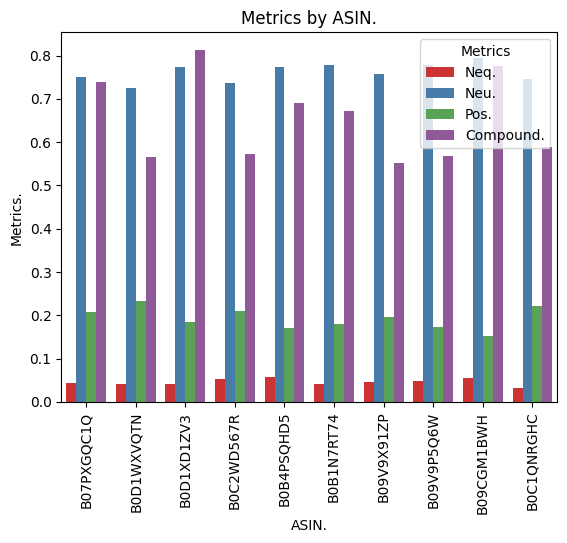

In [ ]:
nltk_df = pd.DataFrame(average_hash_map).T
nltk_df.columns = ["Neq.", "Neu.", "Pos.", "Compound."]
nltk_df = nltk_df.reset_index().rename(columns={"index": "Product_ID"})
df_melted = nltk_df.melt(id_vars="Product_ID", var_name="Metrics", value_name="Values")
custom_palette = sns.color_palette("Set1")
sns.barplot(data=df_melted, x="Product_ID", y="Values", hue="Metrics", palette=custom_palette)
plt.title("Metrics by ASIN.")
plt.xlabel("ASIN.")
plt.ylabel("Metrics.")
plt.xticks(rotation=90)
plt.show()

**B07PXGQC1Q**: Apple AirPods. (2nd Generation)
**B0D1WXVQTN**: Apple AirPods. (3rd Generation)
**B0D1XD1ZV3**: Apple AirPods Pro. (2nd Generation)
**B0C2WD567R**: Beats Studio Buds +.
**B0B4PSQHD5**: Bose QuietComfort Earbuds II.
**B0B1N7RT74**: Google Pixel Buds Pro.
**B09V9X91ZP**: JBL Live Free 2.
**B09V9P5Q6W**: JBL Live Pro TWS 2.
**B09CGM1BWH**: Soundcore Liberty 3 Pro.
**B0C1QNRGHC**: JBL Tune Flex.

### 6.2 Results

- The majority of earphones received consistently high ratings, indicating overall customer satisfaction. However, the Bose QuietComfort Earbuds 2 and Soundcore Liberty 3 Pro show a broader range in their ratings, suggesting mixed experiences among users. This variability highlights potential inconsistencies in performance or user expectations that may warrant further investigation.
- Upvote distribution across reviews is generally low and evenly spread, reflecting typical engagement levels. However, there is a notable outlier: the Google Pixel Buds Pro. This product received over 300 upvotes on a specific review, which is more than 10 times the average upvote count of around 25. This significant disparity suggests a strong customer reaction, likely tied to a particularly impactful review, which could be either highly positive or negative, and merits closer examination.


## 7. AI-Generated Insights

### 7.1 Using Gemini AI

**Example Prompts.**

1. "According to the following reviews, what are the main issues associated with this product? Give a concise answer with bullet points. Use 10 bullet points, rank it from the highest priority to the lowest priority. Be concise, don't return any text except those 10 bullet points." **+ product reviews.**
2. "According to the following reviews, what are the unofficial feature requests that the consumers have made in the reviews? This can include a consumer saying it would have beein much better if the feature X was added or some aspect of the product has been changed. Give a concise answer with bullet points. Use 10 bullet points, rank it from the highest priority to the lowest priority. Be concise, don't return any text except those 10 bullet points." **+ product reviews.**
3. "According to the following reviews, what are the best things in the customers minds about this product? Give a concise answer with bullet points. Use 10 bullet points, rank it from the highest priority to the lowest priority. Be concise, don't return any text except those 10 bullet points." **+ product reviews.**

### 7.2 Key Insights

**Response 1.**

-  Earbuds frequently disconnect from iPhone and require manual reconnection.
-  Left earbud experiences thumping noise in noise cancelling or transparency mode.
-  Difficult to remove earbuds from the case due to their low profile.
-  Earbuds fall out of ears easily, especially during exercise or sweating.
-  Inconsistent microphone performance during phone calls.
-  No wireless charging option.
-  Earbuds don't automatically pause playback when removed from ears.
-  Earbuds randomly connect to phone while in the case.
-  Earbuds have a slippery texture, making them prone to dropping.
-  No customizable EQ settings.

**Response 2.**

- Unreliable connection to iPhone, especially when pausing audio
- Difficulty getting earbuds out of the case due to low profile design
- Lack of wireless charging
- No in-ear detection, so music doesn't pause when removing earbuds
- Buds fall out of ears easily, especially during exercise
- Microphone issues, making it hard for others to hear during phone calls
- Randomly switching to transparency mode when putting one earbud in the case
- Inconsistent noise cancellation, sometimes producing a humming sound
- Earbuds are too smooth, making it difficult to grip and potentially leading to drops
- No customizable EQ settings, limiting sound customization

**Response 3.**

- Excellent sound quality
- Great noise cancellation
- Long battery life
- Comfortable fit
- Seamless integration with Apple products
- Strong Bluetooth connection
- Touch controls
- Transparency mode
- Easy pairing
- Good value for the price

### 7.3 Interpretation

**Interpretation.**

- The insights from the responses highlight key areas for improvement and strengths in Beats by Dre earbuds. Users commonly report issues with connectivity, comfort, and functionality, such as frequent disconnections, earbuds falling out, and the lack of features like wireless charging and customizable EQ settings. These problems suggest that improvements in design and technology are needed to meet consumer expectations. However, the earbuds are also praised for their excellent sound quality, noise cancellation, and seamless integration with Apple products, indicating that these strengths should be maintained and emphasized. Overall, addressing the identified weaknesses while promoting the product's positive aspects could enhance user satisfaction and market competitiveness.

## 8. Comparative Analysis

### 8.1 Competitor Overview

**Competitors.**

- **Apple AirPods (2nd Generation):** Entry-level earbuds, seamless Apple integration.
- **Apple AirPods (3rd Generation):** Mid-range option, improved sound, balanced cost-performance.
- **Apple AirPods Pro (2nd Generation):** Premium, advanced noise cancellation, top-tier Apple experience.
- **Bose QuietComfort Earbuds II:** High-end, best-in-class noise cancellation, for audiophiles and travelers.
- **Google Pixel Buds Pro:** Premium, designed for Android users, strong Google Assistant integration.
- **JBL Live Free 2:** Mid-range, durable, reliable sound quality.
- **JBL Live Pro TWS 2:** Feature-rich, active noise cancellation, better battery life.
- **Soundcore Liberty 3 Pro:** Affordable, good sound and noise cancellation, value-focused.
- **JBL Tune Flex:** Budget-friendly, decent sound, economical choice.


### 8.2 Comparison of Sentiments


- The sentiment analysis for Beats by Dre (Product ID: B0C2WD567R) reveals a generally positive perception among users, particularly regarding its sound quality, noise cancellation, and battery life. Users also appreciate the comfortable fit and seamless integration with Apple products, along with a strong Bluetooth connection and touch controls. However, there are notable criticisms, including unreliable connection issues with iPhones, difficulty in removing the earbuds from the case, and the absence of wireless charging. Other concerns include the lack of in-ear detection, inconsistent noise cancellation, and microphone issues during calls. The slippery texture of the earbuds, which makes them prone to dropping, is also a frequently mentioned downside.

- In comparison, Product B07PXGQC1Q is similarly praised for its integration with Apple devices, sound quality, battery life, and fit. However, it faces significant criticism for lacking active noise cancellation and being perceived as overpriced. Fit issues and limited customization options also contribute to the negative sentiment, along with concerns about diminishing battery life over time.

- Product B0D1WXVQTN receives positive feedback for its sound quality, fit, and connectivity, as well as its impressive battery life. Nonetheless, it is criticized for fit issues, the absence of key features like wireless charging and noise cancellation, and concerns about its price relative to its feature set. Finally, Product B0D1XD1ZV3 is well-regarded for its sound quality, noise cancellation, and comfortable fit, but it is also noted for issues with fit, inconsistent noise cancellation, and problems with volume control.

- Overall, while Beats by Dre excels in several key areas, it shares some common criticisms with its competitors, particularly regarding fit and connectivity issues.

### 8.3 SWOT Analysis

**Strengths.**
- Excellent sound quality and noise cancellation.
- Long battery life and comfortable fit.
- Seamless integration with Apple products enhances user experience.

**Weaknesses.**
- Connection issues with iPhones and lack of wireless charging.
- Difficulty in removing earbuds from the case and no in-ear detection.
- Inconsistent microphone performance during calls.

**Opportunities.**
- Expanding customization options, including EQ settings and fit adjustments, could enhance user satisfaction.
- Introducing wireless charging and improving connection stability can address key user complaints.

**Threats.**
- Competitors offer similar or better features, such as noise cancellation and fit options, at competitive prices.
- Persistent connectivity and fit issues may erode customer loyalty and brand reputation.


## 9. Strategic Recommendations

### 9.1 Product Improvements

1. **Improve Connectivity with iPhones:**
   - Enhance the stability of Bluetooth connections to minimize disconnections, especially when pausing or resuming audio.
   - Introduce software updates or optimize the hardware to better handle connectivity with Apple devices.

2. **Add Wireless Charging:**
   - Incorporate wireless charging capabilities in the next iteration of the product to align with industry standards and meet user expectations.

3. **Redesign the Earbud Case:**
   - Modify the design of the charging case to make it easier for users to remove the earbuds, perhaps by adding a more pronounced grip or a push-to-eject mechanism.

4. **Enhance Microphone Quality:**
   - Improve the microphone design or software processing to ensure clearer voice transmission during calls, especially in noisy environments.

5. **Introduce Customizable EQ Settings:**
   - Offer a range of EQ settings or a customizable EQ option within the accompanying app to allow users to tailor the sound profile to their preferences.

6. **Improve Fit and Comfort:**
   - Offer additional ear tip sizes and materials, such as memory foam, to ensure a more secure and comfortable fit, particularly during physical activities.
   - Consider designing optional ear hooks or wings for users who need extra stability.

7. **Refine Noise Cancellation:**
   - Work on making noise cancellation more consistent across different environments, reducing the instances of hum or inconsistent performance.

8. **Add In-Ear Detection:**
   - Incorporate sensors that automatically pause playback when the earbuds are removed from the ears, enhancing the overall user experience.


### 9.2 Marketing Strategies

1. **Highlight Improved Features in Marketing Campaigns:**
   - Focus on promoting enhancements like improved connectivity, wireless charging, and customizable EQ settings in future marketing efforts.
   - Use targeted advertising to emphasize these improvements, especially to current users and those who experienced issues with previous models.

2. **Leverage Customer Testimonials and User Reviews:**
   - Showcase positive customer feedback, especially around sound quality, noise cancellation, and integration with Apple products, in promotional materials.
   - Use real user testimonials in social media campaigns to build trust and authenticity.

3. **Promote Fitness-Friendly Design Enhancements:**
   - Position the product as ideal for active lifestyles by emphasizing improvements in fit and comfort, particularly for exercise and sports use.
   - Collaborate with fitness influencers and athletes to demonstrate the product's stability and comfort during physical activities.

4. **Expand Educational Content:**
   - Create tutorial videos and guides that explain how to optimize and customize the product, particularly the new EQ settings and noise cancellation features.
   - Offer tips on maintaining a secure fit and getting the most out of the product’s features to enhance user satisfaction.

5. **Offer Limited-Time Discounts and Bundles:**
   - Introduce promotional discounts or bundle offers that include accessories like additional ear tips, wireless chargers, or protective cases to add value.
   - Time these promotions around key shopping periods, such as holidays or product launch anniversaries.

6. **Engage with Customers Through Social Media:**
   - Encourage users to share their experiences and provide feedback on social media, fostering a community around the product.
   - Host live Q&A sessions or webinars where users can interact with product experts and learn more about the features and benefits of the product.

7. **Emphasize Sustainability and Durability:**
   - Highlight any eco-friendly materials or practices used in the product’s design and manufacturing to appeal to environmentally conscious consumers.
   - Promote the product’s durability and longevity as a key selling point, reinforcing the idea of a worthwhile investment.

8. **Utilize Influencer Partnerships:**
   - Partner with tech reviewers, musicians, and lifestyle influencers who align with the Beats brand to showcase the product’s features in real-world scenarios.
   - Ensure these influencers provide authentic reviews and usage scenarios that resonate with target audiences.


### 9.3 Future Research

1. **Longitudinal Consumer Sentiment Analysis:**
   - Conduct a longitudinal study to track changes in consumer sentiment over time, particularly before and after implementing product improvements. This would provide insights into how updates influence consumer satisfaction and brand loyalty.

2. **Comparative Analysis Across Different Market Segments:**
   - Analyze consumer sentiment across different demographic segments, such as age, gender, and geographic location. Understanding how different groups perceive the product could inform more targeted marketing and product development strategies.

3. **Competitor Benchmarking:**
   - Expand the analysis to include a broader range of competitors, particularly emerging brands or those with innovative features. This would help identify new trends and potential threats in the market.

4. **Feature-Specific Feedback Collection:**
   - Collect detailed consumer feedback on specific features, such as noise cancellation and EQ settings, to understand which aspects are most valued by users and where there is room for improvement.

5. **Impact of Brand Perception on Purchasing Decisions:**
   - Investigate how overall brand perception influences purchasing decisions, particularly in comparison to specific product features. This could provide insights into the importance of brand loyalty versus feature set in driving sales.

## 10. Conclusion

- The sentiment analysis for Beats by Dre (Product ID: B0C2WD567R) revealed strong consumer appreciation for its sound quality, noise cancellation, and battery life, which are critical factors in user satisfaction. However, recurring issues with connectivity, fit, and lack of wireless charging emerged as significant pain points. These weaknesses highlight areas where product improvements are necessary to maintain competitiveness and meet consumer expectations.
- Addressing the identified weaknesses, such as enhancing Bluetooth connectivity and adding wireless charging, could significantly boost user satisfaction and loyalty.
- Improving fit and comfort, particularly for active users, can expand the product’s appeal to a broader market segment.
- Customization options, like EQ settings, would allow Beats to cater to diverse user preferences, potentially increasing market share.
- This project provided valuable insights into consumer sentiment regarding Beats by Dre, helping to identify both strengths to be emphasized in marketing and areas requiring product enhancement. The findings contribute to a deeper understanding of customer priorities, enabling more targeted product development and marketing strategies. By focusing on these consumer-driven insights, Beats by Dre can better align its offerings with customer needs, ultimately improving brand perception and market position.
